Downloading the dataset from OAS database. For a single file, you can directly use wget. If there are multiple files, you can write a script that has multiple wgets. OAS website will also provide a script if your search returns multiple data units.

In [1]:
!wget https://opig.stats.ox.ac.uk/webapps/ngsdb/paired/Jaffe_2022/csv/1287203_1_Paired_All.csv.gz

--2024-11-26 05:47:30--  https://opig.stats.ox.ac.uk/webapps/ngsdb/paired/Jaffe_2022/csv/1287203_1_Paired_All.csv.gz
Resolving opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)... 163.1.32.59
Connecting to opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)|163.1.32.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20775801 (20M) [application/x-gzip]
Saving to: '1287203_1_Paired_All.csv.gz.2'

     0K .......... .......... .......... .......... ..........  0% 79.8K 4m14s
    50K .......... .......... .......... .......... ..........  0%  229K 2m51s
   100K .......... .......... .......... .......... ..........  0% 5.01M 1m55s
   150K .......... .......... .......... .......... ..........  0%  101K 2m15s
   200K .......... .......... .......... .......... ..........  1% 7.98M 1m49s
   250K .......... .......... .......... .......... ..........  1%  192M 90s
   300K .......... .......... .......... .......... ..........  1%  138M 77s
   350K .......... .......... .......... ....

In [2]:
import pandas as pd
import OAS_wrapper


The downloaded csv.gz file has metadata parameters in the first line followed by a CSV format of sequence related information. The below script separates metadata, print the metadata information.


In [3]:
data_unit_file = "1287203_1_Paired_All.csv.gz"

# Extract metadata and sequences
metadata, sequences = OAS_wrapper.extract_metadata_and_sequences(data_unit_file)

print("Metadata:")
print(metadata)

Metadata:
{'Run': 1287203, 'Link': 'https://doi.org/10.1038/s41586-022-05371-z', 'Author': 'Jaffe et al., 2022', 'Species': 'human', 'Age': 45, 'BSource': 'PBMC', 'BType': 'Naive-B-Cells', 'Vaccine': 'None', 'Disease': 'SARS-COV-2', 'Subject': 'Donor-1', 'Longitudinal': 'no', 'Unique sequences': 19627, 'Isotype': 'All', 'Chain': 'Paired'}


Exploring the columns present in the downloaded dataset for downstream analysis.
Information rich table that has 198 columns (for paired datasets), and printing out columns that have "heavy" in their name.

In [4]:
sequences.head(n=1)


,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
0,AAACCTGAGAGACGAA-1_contig_1,ACATGGAAAATACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAAC...,H,F,T,F,T,F,T,IGHV4-61*02,...,410.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||


In [5]:
columns_with_heavy_field = [col for col in sequences.columns if 'heavy' in col]
print("Columns with heavy string:", columns_with_heavy_field)

Columns with heavy string: ['sequence_id_heavy', 'sequence_heavy', 'locus_heavy', 'stop_codon_heavy', 'vj_in_frame_heavy', 'v_frameshift_heavy', 'productive_heavy', 'rev_comp_heavy', 'complete_vdj_heavy', 'v_call_heavy', 'd_call_heavy', 'j_call_heavy', 'sequence_alignment_heavy', 'germline_alignment_heavy', 'sequence_alignment_aa_heavy', 'germline_alignment_aa_heavy', 'v_alignment_start_heavy', 'v_alignment_end_heavy', 'd_alignment_start_heavy', 'd_alignment_end_heavy', 'j_alignment_start_heavy', 'j_alignment_end_heavy', 'v_sequence_alignment_heavy', 'v_sequence_alignment_aa_heavy', 'v_germline_alignment_heavy', 'v_germline_alignment_aa_heavy', 'd_sequence_alignment_heavy', 'd_sequence_alignment_aa_heavy', 'd_germline_alignment_heavy', 'd_germline_alignment_aa_heavy', 'j_sequence_alignment_heavy', 'j_sequence_alignment_aa_heavy', 'j_germline_alignment_heavy', 'j_germline_alignment_aa_heavy', 'fwr1_heavy', 'fwr1_aa_heavy', 'cdr1_heavy', 'cdr1_aa_heavy', 'fwr2_heavy', 'fwr2_aa_heavy', 'c

For a subset of the above columns that are strings (i.e., sequence, germline, V, D, J etc), total and unique number of such strings can be identified, along with plotting the distributions for easy comparison.

In [6]:
summary_table = OAS_wrapper.column_summary(data_unit_file, ["sequence_heavy", "v_sequence_alignment_heavy", "germline_alignment_heavy"])
print(summary_table)

                  Column Name  Total Count  Unique Count
0              sequence_heavy        19627         19459
1  v_sequence_alignment_heavy        19627          7512
2    germline_alignment_heavy        19627         19063


From the above table, it is clear that while the number of unique sequences is less than total number, the number of unique germline is less than the unique sequences, highlighting that a single germline can be the origin of multiple sequences. In addition, the number of unique variable sequences is significantly less as expected.

Below, we show the distributions of lengths of these different fields:

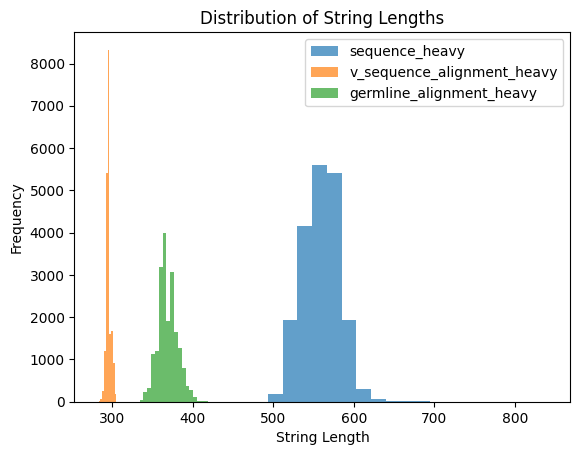

In [7]:
OAS_wrapper.plot_string_length_distribution(data_unit_file, ["sequence_heavy", "v_sequence_alignment_heavy", "germline_alignment_heavy"])


The Variable, Diversity and Junction (VDJ) regions of a particular sequence are annotated with the identifier that is obtained from IMGT reference database (as shown below).

In [8]:
sequences[["v_call_heavy", "d_call_heavy", "j_call_heavy"]]

,v_call_heavy,d_call_heavy,j_call_heavy
0,IGHV4-61*02,IGHD3-9*01,IGHJ3*02
1,IGHV3-23*01,IGHD3-3*01,IGHJ3*02
2,IGHV1-3*01,IGHD2-21*02,IGHJ5*02
3,IGHV3-15*01,IGHD3-10*01,IGHJ4*02
4,IGHV3-23*04,IGHD5-12*01,IGHJ5*02
...,...,...,...
19622,IGHV1-3*01,IGHD6-13*01,IGHJ3*02
19623,IGHV1-24*01,IGHD3-10*01,IGHJ6*03
19624,IGHV3-30*18,IGHD2-2*01,IGHJ4*02
19625,IGHV3-15*01,IGHD3-3*01,IGHJ6*02


If a user is interested to map the identifier to the actual sequences, below script can be used:

In [9]:
# Retrieve the original sequences first
v_sequences_db_path = "../refs/imgt_human_IGHV_sequences.txt"
d_sequences_db_path = "../refs/imgt_human_IGHD_sequences.txt"
j_sequences_db_path = "../refs/imgt_human_IGHJ_sequences.txt"

In [10]:
# Assuming you have loaded your DataFrame and sequences DataFrames (df, v_sequences_df, d_sequences_df, j_sequences_df)
query_sequence = 'AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG'
v_sequences_df = pd.read_csv(v_sequences_db_path, names=("v_call", "sequence"), header=None, sep="\t")
d_sequences_df = pd.read_csv(d_sequences_db_path, names=("d_call", "sequence"), header=None, sep="\t")
j_sequences_df = pd.read_csv(j_sequences_db_path, names=("j_call", "sequence"), header=None, sep="\t")
result = OAS_wrapper.tabulate_query_sequence(query_sequence, data_unit_file, v_sequences_df, d_sequences_df, j_sequences_df, paired=True)
print(result)

{'sequence_heavy': 'AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG', 'v_call': 'IGHV3-23*01', 'v_sequence': 'gaggtgcagctgttggagtctggggga...ggcttggtacagcctggggggtccctgagactctcctgtgcagcctctggattcaccttt............agcagctatgccatgagctgggtccgccaggctccagggaaggggctggagtgggtctcagctattagtggtagt......ggtggtagcacatactacgcagactccgtgaag...ggccggttcaccatctccagagacaattccaagaacacgctgtatctgcaaatgaacagcctgagagccgaggacacggccgtatattactgtgcgaaaga', 'd_call': 'IGHD3-3*01', '

Aligning sequence and germline to identify the differences:

In [11]:
query_sequence = 'AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG'
OAS_wrapper.align_and_compare_with_annotations(data_unit_file, "sequence_alignment_heavy", "germline_alignment_heavy", "sequence_heavy", query_sequence)

Row 2:
Original Sequence 1: GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAG
Original Sequence 2: GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGTGGTGGTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAANNNNNNNNNTACGATTTTTGGAGTGGTTATTATACNNNNNATGCTTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAG
Aligned and Highlighted Differences:
GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAG

Grouping by germline sequences, to identify all the sequences that fall within that germline, along with the VDJ annotatons:

In [12]:
required_columns = {"sequence_heavy", "germline_alignment_heavy", "v_call_heavy", "d_call_heavy", "j_call_heavy"}
germline_col = "germline_alignment_heavy"
sequence_col = "sequence_heavy"

germline_df = OAS_wrapper.process_germline_mappings_with_calls(data_unit_file, required_columns, germline_col, sequence_col)

filtered_df = germline_df[germline_df['number_of_sequences'] == max(germline_df["number_of_sequences"])]
filtered_df

,germline_alignment_heavy,number_of_sequences,sequence_heavy,v_call_heavy,j_call_heavy,d_call_heavy,sequence_id_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
5498,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,GGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGGAC...,IGHV4-31*03,IGHJ4*02,IGHD3-10*01,ATGGGAGCAGTCCTTC-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5499,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,GATACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAACATGAAACA...,IGHV4-31*03,IGHJ4*02,IGHD3-10*01,CACCTTGAGACACTAA-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5500,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,TGGGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGG...,IGHV4-31*03,IGHJ4*02,IGHD3-10*01,CAGAGAGGTCTCAACA-1_contig_1,H,F,T,...,399.0,GGCCGTT,7,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5501,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,TGGGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGG...,IGHV4-31*03,IGHJ4*02,IGHD3-10*01,CAGCTAACAGTAACGG-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5502,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,GAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGGACCT...,IGHV4-31*03,IGHJ4*02,IGHD3-10*01,CCACGGATCGCTGATA-1_contig_1,H,F,T,...,399.0,GGCCGTT,7,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5503,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,CCTATTATCGTAGATCAGGAAGTGACTTTCTTCTAAGGGGAGGGTC...,IGHV4-31*03,IGHJ4*02,IGHD3-10*01,CCTATTATCGTAGATC-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5504,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,TGGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGGA...,IGHV4-31*03,IGHJ4*02,IGHD3-10*01,CGAACATCAAGCCTAT-1_contig_2,H,F,T,...,399.0,GGCCGTT,7,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5505,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,TGGGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGG...,IGHV4-31*03,IGHJ4*02,IGHD3-10*01,CTTTGCGTCTCTAAGG-1_contig_2,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5506,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,TATATGGGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTC...,IGHV4-31*03,IGHJ4*02,IGHD3-10*01,GACTGCGAGCAATCTC-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5507,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,GGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGGACC...,IGHV4-31*03,IGHJ4*02,IGHD3-10*01,GCATGCGAGCTGCCCA-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||


In [13]:
print(filtered_df.iloc[0, :6])


germline_alignment_heavy    CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...
number_of_sequences                                                        16
sequence_heavy              GGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGGAC...
v_call_heavy                                                      IGHV4-31*03
j_call_heavy                                                         IGHJ4*02
d_call_heavy                                                      IGHD3-10*01
Name: 5498, dtype: object


For a particular sequence, annotate the CDR, FWR regions:

In [14]:
sequence_column = "sequence_heavy"  # Replace with the column name in your CSV 
OAS_wrapper.annotate_query_sequence(data_unit_file, sequence_column, query_sequence)

'AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGA(cdr1 170-193)CTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAG(cdr2 245-253)GCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTG(cdr3 362-394)AGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG'

In [15]:
filtered_df_4 = germline_df[germline_df['number_of_sequences'] == 9]
print(filtered_df_4.iloc[0, :6])

germline_alignment_heavy    GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...
number_of_sequences                                                         9
sequence_heavy              AGGTCTCAGAGAGGAGCCTTAGCCCTGGACTCCAAGGCCTTTCCAC...
v_call_heavy                                                       IGHV3-7*01
j_call_heavy                                                         IGHJ6*03
d_call_heavy                                                      IGHD5-18*01
Name: 18190, dtype: object


In [16]:
import pandas as pd

def format_columns_to_table(df, columns_per_row=6):
    """
    Prints the column names of a DataFrame in a tabular format with a specified number of columns per row.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns_per_row (int): Number of columns per row in the table (default is 6).
    """
    # Get all column names
    columns = df.columns.tolist()
    
    # Group column names into rows with the specified number of columns
    rows = [columns[i:i + columns_per_row] for i in range(0, len(columns), columns_per_row)]
    
    # Print the table
    print(f"{' | '.join([f'Column {i+1}' for i in range(columns_per_row)])}")
    print("-" * (15 * columns_per_row))
    for row in rows:
        print(" | ".join(f"{col:<15}" for col in row))  # Format with padding for neat alignment

In [17]:
format_columns_to_table(sequences)

Column 1 | Column 2 | Column 3 | Column 4 | Column 5 | Column 6
------------------------------------------------------------------------------------------
sequence_id_heavy | sequence_heavy  | locus_heavy     | stop_codon_heavy | vj_in_frame_heavy | v_frameshift_heavy
productive_heavy | rev_comp_heavy  | complete_vdj_heavy | v_call_heavy    | d_call_heavy    | j_call_heavy   
sequence_alignment_heavy | germline_alignment_heavy | sequence_alignment_aa_heavy | germline_alignment_aa_heavy | v_alignment_start_heavy | v_alignment_end_heavy
d_alignment_start_heavy | d_alignment_end_heavy | j_alignment_start_heavy | j_alignment_end_heavy | v_sequence_alignment_heavy | v_sequence_alignment_aa_heavy
v_germline_alignment_heavy | v_germline_alignment_aa_heavy | d_sequence_alignment_heavy | d_sequence_alignment_aa_heavy | d_germline_alignment_heavy | d_germline_alignment_aa_heavy
j_sequence_alignment_heavy | j_sequence_alignment_aa_heavy | j_germline_alignment_heavy | j_germline_alignment_aa_heavy

In [20]:
def format_results_separately(result_dict):
    """
    Formats the tabulated query sequence results (in dict format) to present each feature in a separate row.

    Args:
        result_dict (dict): The output dictionary with V, D, J calls, and alignment information.

    Returns:
        pd.DataFrame: A new DataFrame where each feature is in a separate row.
    """
    formatted_rows = []
    for key, value in result_dict.items():
        # Append key-value pairs as separate rows
        formatted_rows.append([key, value])
    
    # Create a DataFrame for better tabular representation
    formatted_df = pd.DataFrame(formatted_rows, columns=["Feature", "Value"])
    return formatted_df



In [21]:
# Format results to display each in a separate row
formatted_result = format_results_separately(result)
print(formatted_result)

                    Feature                                              Value
0            sequence_heavy  AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...
1                    v_call                                        IGHV3-23*01
2                v_sequence  gaggtgcagctgttggagtctggggga...ggcttggtacagcctg...
3                    d_call                                         IGHD3-3*01
4                d_sequence                    gtattacgatttttggagtggttattatacc
5                    j_call                                           IGHJ3*02
6                j_sequence  tgatgcttttgatatctggggccaagggacaatggtcaccgtctct...
7  sequence_alignment_heavy  GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGG...
8  germline_alignment_heavy  GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...
